<a href="https://colab.research.google.com/github/Cristiand056/archivo_danilo/blob/main/danilo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el archivo CSV
df = pd.read_csv(r'/content/ACA_III_bdd.csv', sep=';')

In [3]:
# Convertir la columna 'fecha' a tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'])

In [5]:
# Crear nuevas columnas útiles para análisis
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month

In [6]:
# 1. Tendencias de ventas en los últimos años y crecimiento por categoría de producto
ventas_por_año = df.groupby('año')['ventas'].sum().reset_index()
crecimiento_ventas = ventas_por_año.set_index('año').pct_change().fillna(0)

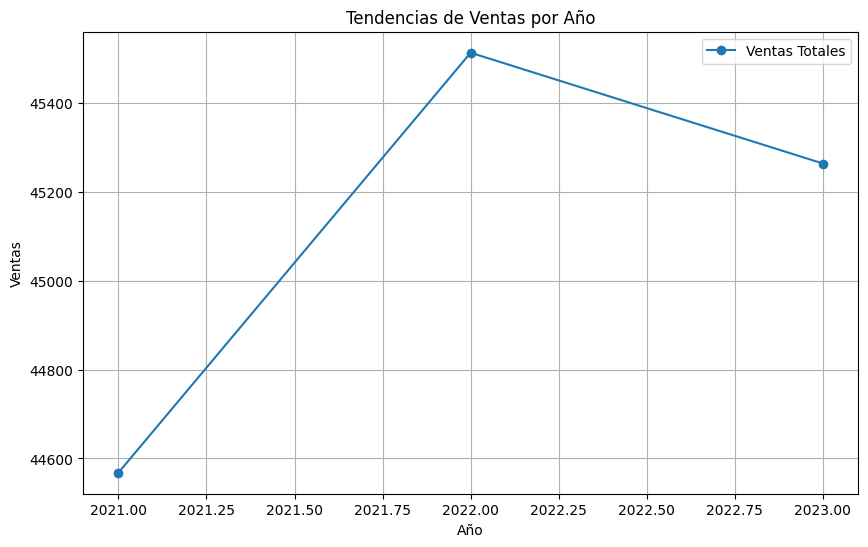

In [7]:
# Visualización de tendencias de ventas
plt.figure(figsize=(10, 6))
plt.plot(ventas_por_año['año'], ventas_por_año['ventas'], marker='o', label='Ventas Totales')
plt.title('Tendencias de Ventas por Año')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
# Crecimiento por categoría de producto
ventas_por_categoria = df.groupby(['año', 'categoria_producto'])['ventas'].sum().unstack()
crecimiento_categoria = ventas_por_categoria.pct_change().fillna(0)

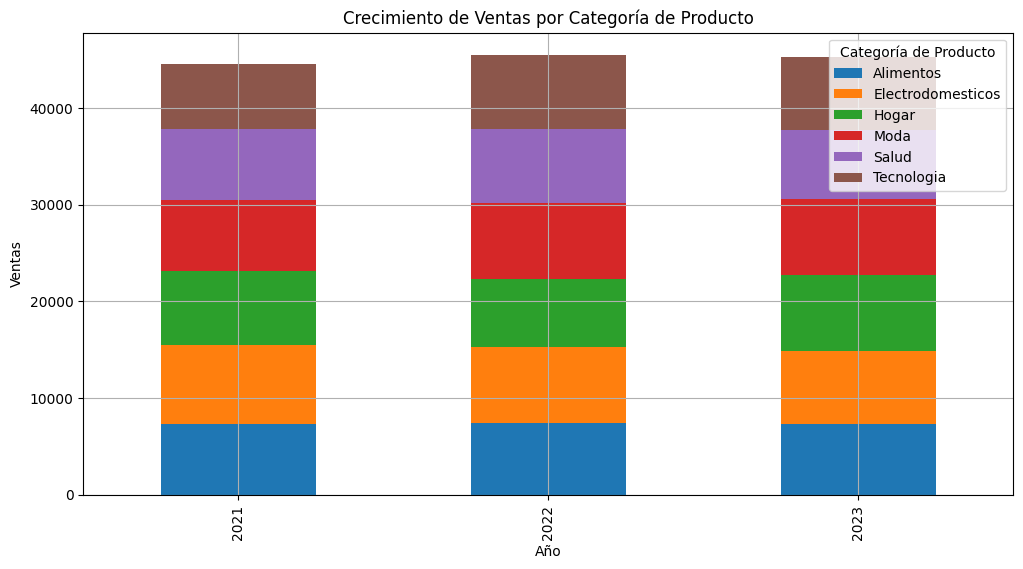

In [9]:
# Visualización de crecimiento por categoría de producto
ventas_por_categoria.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Crecimiento de Ventas por Categoría de Producto')
plt.ylabel('Ventas')
plt.xlabel('Año')
plt.legend(title='Categoría de Producto')
plt.grid(True)
plt.show()

In [10]:
# 2. ¿Qué región ha generado mayor utilidad en los últimos dos años?
utilidad_por_region = df[df['año'].isin([df['año'].max(), df['año'].max()-1])].groupby('region')['utilidad'].sum()
mayor_utilidad_region = utilidad_por_region.idxmax()
mayor_utilidad = utilidad_por_region.max()

In [11]:
print(f'La región con mayor utilidad en los últimos dos años es {mayor_utilidad_region} con una utilidad de {mayor_utilidad}')

La región con mayor utilidad en los últimos dos años es Bogota con una utilidad de 427150841


## Factores que influyen en la utilidad de la región
###* Se podría hacer un análisis más detallado usando correlaciones o análisis de regresión

In [12]:
# 3. Relación entre satisfacción del cliente y utilidad generada por cada categoría de producto
relacion_satisfaccion_utilidad = df.groupby('categoria_producto').agg({'satisfaccion_cliente': 'mean', 'utilidad': 'sum'}).reset_index()

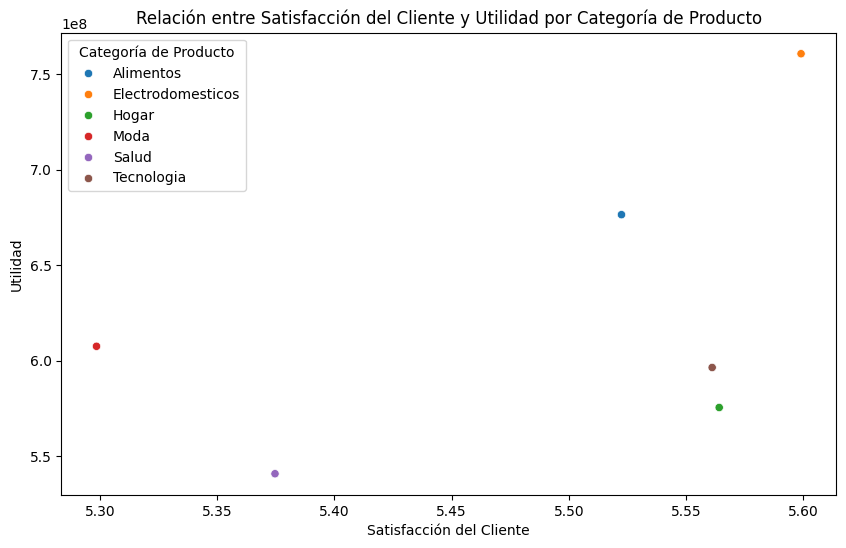

In [13]:
# Visualización de la relación
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaccion_cliente', y='utilidad', data=relacion_satisfaccion_utilidad, hue='categoria_producto')
plt.title('Relación entre Satisfacción del Cliente y Utilidad por Categoría de Producto')
plt.xlabel('Satisfacción del Cliente')
plt.ylabel('Utilidad')
plt.legend(title='Categoría de Producto')
plt.show()

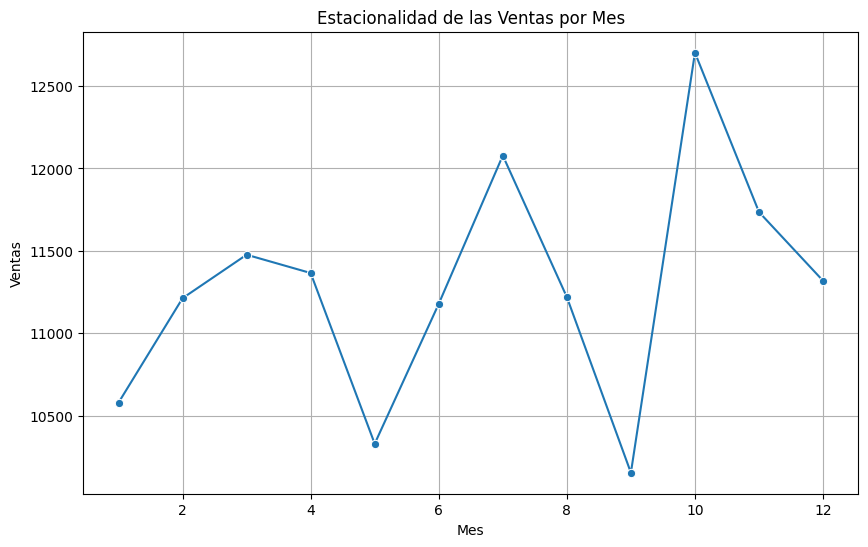

In [14]:
# 4. Estacionalidad en las ventas según el mes del año
ventas_por_mes = df.groupby('mes')['ventas'].sum().reset_index()

# Visualización de la estacionalidad
plt.figure(figsize=(10, 6))
sns.lineplot(x='mes', y='ventas', data=ventas_por_mes, marker='o')
plt.title('Estacionalidad de las Ventas por Mes')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

In [15]:
# 5. ¿Cuáles son los meses más rentables?
df['margen_utilidad'] = df['utilidad'] / df['ventas']
margen_utilidad_por_mes = df.groupby('mes')['margen_utilidad'].mean().reset_index()

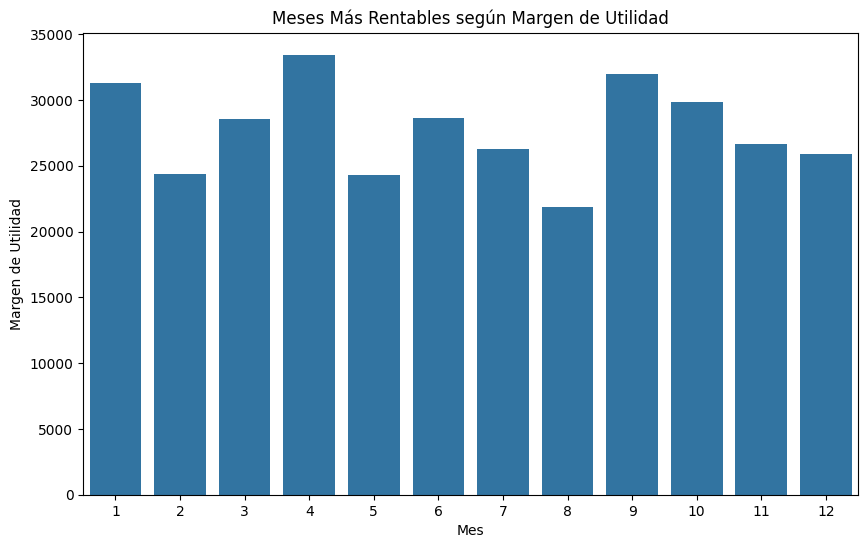

In [16]:
# Visualización de los meses más rentables
plt.figure(figsize=(10, 6))
sns.barplot(x='mes', y='margen_utilidad', data=margen_utilidad_por_mes)
plt.title('Meses Más Rentables según Margen de Utilidad')
plt.xlabel('Mes')
plt.ylabel('Margen de Utilidad')
plt.show()

In [17]:
# 6. Categoría de producto con el mayor margen de utilidad y su variación
df['margen'] = (df['utilidad'] / df['ventas'])
margen_categoria = df.groupby('categoria_producto')['margen'].mean().reset_index()
mayor_margen_categoria = margen_categoria.loc[margen_categoria['margen'].idxmax()]

In [18]:
# Variación del margen de utilidad por categoría
margen_categoria_variacion = df.groupby(['año', 'categoria_producto'])['margen'].mean().unstack()

<Figure size 1200x600 with 0 Axes>

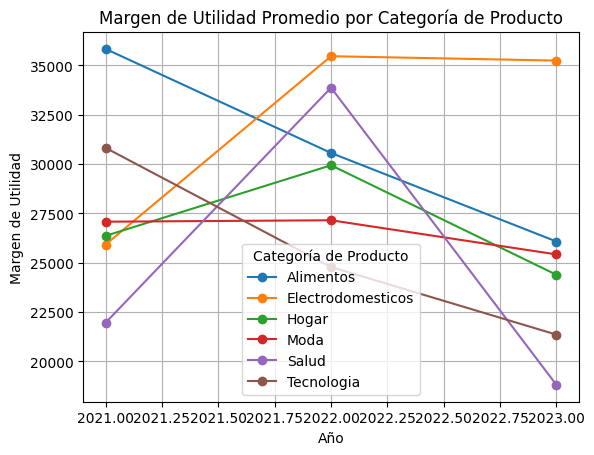

In [19]:
# Visualización del margen de utilidad por categoría
plt.figure(figsize=(12, 6))
margen_categoria_variacion.plot(kind='line', marker='o')
plt.title('Margen de Utilidad Promedio por Categoría de Producto')
plt.ylabel('Margen de Utilidad')
plt.xlabel('Año')
plt.legend(title='Categoría de Producto')
plt.grid(True)
plt.show()

In [20]:
# 7. Relación entre costos, ventas y utilidades por región
costos_ventas_utilidad_region = df.groupby('region').agg({'ventas': 'sum', 'utilidad': 'sum', 'costo_unitario': 'sum'}).reset_index()

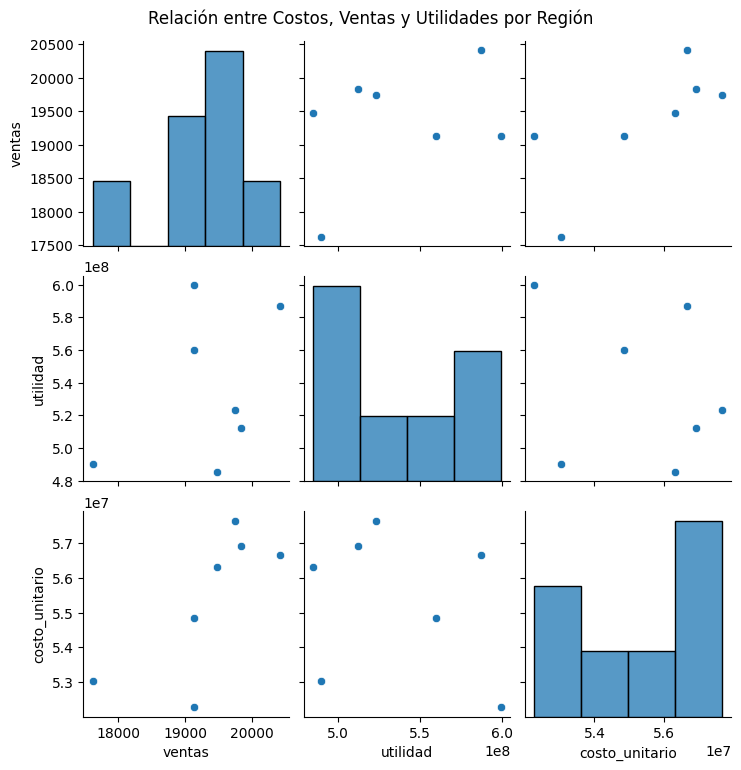

In [21]:
# Visualización de la relación entre costos, ventas y utilidades
sns.pairplot(costos_ventas_utilidad_region[['ventas', 'utilidad', 'costo_unitario']])
plt.suptitle('Relación entre Costos, Ventas y Utilidades por Región', y=1.02)
plt.show()

### 8. Recomendaciones para mejorar la rentabilidad (basadas en el análisis)
### A partir del análisis, se pueden generar algunas recomendaciones, por ejemplo:
recomendaciones = {
    '1. Mejorar la satisfacción del cliente en las categorías con menor utilidad': 'Aumentar la satisfacción podría aumentar la rentabilidad.',
    '2. Enfocar promociones en los meses más rentables': 'Los meses con mayor margen de utilidad deben ser aprovechados.',
    '3. Analizar costos en las regiones con mayor gasto y baja utilidad': 'Reducir costos en esas regiones podría mejorar los márgenes.'
}

### Objetivo para el año siguiente:
objetivo = {
    '1. Incrementar la satisfacción del cliente en un 10% en las categorías más bajas.',
    '2. Aumentar las ventas en los meses menos rentables en un 15%.',
    '3. Reducir los costos unitarios en un 5% en las regiones con mayores costos.'
}

print(f'Recomendaciones para mejorar la rentabilidad: {recomendaciones}')
print(f'Objetivos para el próximo año: {objetivo}')